# Market Basket Analysis for Retailer

## Introduction
In this project, we aim to analyze transaction data from a retailer using association rules to identify patterns and relationships among items purchased together. The goal is to provide the retailer with insights to improve customer engagement and experience by suggesting itemsets that customers are most likely to purchase together.

## About Dataset

### Market Basket Analysis

Market basket analysis with Apriori algorithm aims to target customers with suggestions on itemsets they are most likely to purchase. The dataset contains transaction data from a retailer, providing insights into all transactions over a period of time. By using the results, the retailer can enhance customer engagement, improve customer experience, and better understand customer behavior. This problem will be solved using Association Rules, an unsupervised learning technique that checks for dependencies between data items.

### Introduction to Association Rules
Association Rule learning is commonly used to build associations between different objects in a set, particularly to find frequent patterns in a transaction database. It can reveal what items customers frequently buy together, helping retailers identify relationships between items.

#### An Example of Association Rules
Assume there are 100 customers:
- 10 of them bought a Computer Mouse.
- 9 bought a Mouse Mat.
- 8 bought both.

From this data, we can derive the following rule:
- **Rule**: If a customer bought a Computer Mouse, they also bought a Mouse Mat.
- **Support**: P(Mouse & Mat) = 8/100 = 0.08
- **Confidence**: support/P(Mouse Mat) = 0.08/0.09 = 0.89
- **Lift**: confidence/P(Computer Mouse) = 0.89/0.10 = 8.9

In practice, a rule needs support from several hundred transactions to be statistically significant, and datasets often contain thousands or millions of transactions.

### Strategy
1. **Data Import**
2. **Data Understanding and Exploration**
3. **Data Transformation**: Prepare the data for the association rules algorithm.
4. **Running Association Rules**
5. **Exploring the Generated Rules**
6. **Filtering the Generated Rules**
7. **Visualization of Rules**

### Dataset Description
- **File Name**: Assignment-1_Data
- **List Name**: retaildata
- **File Format**: .xlsx
- **Number of Rows**: 522065
- **Number of Attributes**: 7
  - **BillNo**: 6-digit number assigned to each transaction. (Nominal)
  - **Itemname**: Product name. (Nominal)
  - **Quantity**: The quantities of each product per transaction. (Numeric)
  - **Date**: The day and time when each transaction was generated. (Numeric)
  - **Price**: Product price. (Numeric)
  - **CustomerID**: 5-digit number assigned to each customer. (Nominal)
  - **Country**: Name of the country where each customer resides. (Nominal)

# Importing Necessary Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

# Loading and Exploring the Dataset

In this section, we load the dataset into a pandas DataFrame and perform an initial exploration to understand its structure and contents. This helps in identifying any necessary preprocessing steps and gives insights into the data we will be working with.

In [2]:
RAW_DATA_PATH = "data/Assignment-1_Data.csv"

In [3]:
# Load the dataset
df_raw = pd.read_csv(RAW_DATA_PATH, delimiter=';')

# Display the first few rows of the dataset to understand its structure
df_raw.head()

/tmp/ipykernel_19013/1626323331.py:2: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df_raw = pd.read_csv(RAW_DATA_PATH, delimiter=';')


,BillNo,Itemname,Quantity,Date,Price,CustomerID,Country
0,536365,WHITE HANGING HEART T-LIGHT HOLDER,6,01.12.2010 08:26,"2,55",17850.0,United Kingdom
1,536365,WHITE METAL LANTERN,6,01.12.2010 08:26,"3,39",17850.0,United Kingdom
2,536365,CREAM CUPID HEARTS COAT HANGER,8,01.12.2010 08:26,"2,75",17850.0,United Kingdom
3,536365,KNITTED UNION FLAG HOT WATER BOTTLE,6,01.12.2010 08:26,"3,39",17850.0,United Kingdom
4,536365,RED WOOLLY HOTTIE WHITE HEART.,6,01.12.2010 08:26,"3,39",17850.0,United Kingdom


In [4]:
# Display basic information about the dataset
df_raw.info()

# Check for any missing values
df_raw.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 522064 entries, 0 to 522063
Data columns (total 7 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   BillNo      522064 non-null  object 
 1   Itemname    520609 non-null  object 
 2   Quantity    522064 non-null  int64  
 3   Date        522064 non-null  object 
 4   Price       522064 non-null  object 
 5   CustomerID  388023 non-null  float64
 6   Country     522064 non-null  object 
dtypes: float64(1), int64(1), object(5)
memory usage: 27.9+ MB


BillNo             0
Itemname        1455
Quantity           0
Date               0
Price              0
CustomerID    134041
Country            0
dtype: int64

In [5]:
df_raw.dropna(subset=["CustomerID"], inplace=True)

df_raw.isna().sum()

BillNo        0
Itemname      0
Quantity      0
Date          0
Price         0
CustomerID    0
Country       0
dtype: int64

Converting Data Types

In [6]:
# Convert 'Date' column to datetime format
df_raw['Date'] = pd.to_datetime(df_raw['Date'], format='%d.%m.%Y %H:%M')

# Convert 'Price' column to numeric format (replace commas and convert)
df_raw['Price'] = df_raw['Price'].str.replace(',', '.').astype(float)

Statistical Summary of Numeric Columns

In [7]:
# Display a statistical summary of the numeric columns
df_raw.describe().T

,count,mean,min,25%,50%,75%,max,std
Quantity,388023.0,12.89214,1.0,2.0,5.0,12.0,80995.0,182.605318
Date,388023,2011-07-10 21:25:52.408594176,2010-12-01 08:26:00,2011-04-07 10:54:00,2011-07-31 13:36:00,2011-10-21 09:56:00,2011-12-09 12:50:00,NaN
Price,388023.0,3.079258,0.0,1.25,1.95,3.75,8142.75,21.984569
CustomerID,388023.0,15316.93171,12346.0,13950.0,15265.0,16837.0,18287.0,1721.846964


Handling Negative Values: Investigate the negative values in the Quantity and Price columns to understand if they represent refunds/returns or data entry errors, and handle them appropriately.

In [8]:
# Identify rows with negative values in 'Quantity'
negative_quantity = df_raw[df_raw['Quantity'] < 0]
print(f"Negative Quantity rows: {negative_quantity.shape[0]}")

# Identify rows with negative values in 'Price'
negative_price = df_raw[df_raw['Price'] < 0]
print(f"Negative Price rows: {negative_price.shape[0]}")

# Display some rows with negative 'Quantity'
negative_quantity.head()

# Display some rows with negative 'Price'
negative_price.head()

Negative Quantity rows: 0
Negative Price rows: 0


,BillNo,Itemname,Quantity,Date,Price,CustomerID,Country


In [9]:
# Remove rows with negative values in 'Quantity'
df_cleaned = df_raw[df_raw['Quantity'] >= 0]

# Remove rows with negative values in 'Price'
df_cleaned = df_cleaned[df_cleaned['Price'] >= 0]

# Check if negative values are removed
df_cleaned[df_cleaned['Quantity'] < 0]
df_cleaned[df_cleaned['Price'] < 0]

,BillNo,Itemname,Quantity,Date,Price,CustomerID,Country


## Data Exploration

Now that we have a clean dataset, let's explore it further to understand its characteristics.

Statistical Summary of Numeric Columns

In [10]:
# Display a statistical summary of the numeric columns
df_summary = df_cleaned.describe().T
df_summary

,count,mean,min,25%,50%,75%,max,std
Quantity,388023.0,12.89214,1.0,2.0,5.0,12.0,80995.0,182.605318
Date,388023,2011-07-10 21:25:52.408594176,2010-12-01 08:26:00,2011-04-07 10:54:00,2011-07-31 13:36:00,2011-10-21 09:56:00,2011-12-09 12:50:00,NaN
Price,388023.0,3.079258,0.0,1.25,1.95,3.75,8142.75,21.984569
CustomerID,388023.0,15316.93171,12346.0,13950.0,15265.0,16837.0,18287.0,1721.846964


Exploring Unique Values in Categorical Columns

In [11]:
# Display unique values in categorical columns
categorical_columns = ['BillNo', 'Itemname', 'CustomerID', 'Country']
for column in categorical_columns:
    unique_values = df_cleaned[column].unique()
    print(f"Unique values in {column}: {len(unique_values)}")
    print(unique_values[:10])  # Display first 10 unique values for brevity
    print()

Unique values in BillNo: 18165
[536365 536366 536367 536368 536369 536370 536371 536372 536373 536374]

Unique values in Itemname: 3846
['WHITE HANGING HEART T-LIGHT HOLDER' 'WHITE METAL LANTERN'
 'CREAM CUPID HEARTS COAT HANGER' 'KNITTED UNION FLAG HOT WATER BOTTLE'
 'RED WOOLLY HOTTIE WHITE HEART.' 'SET 7 BABUSHKA NESTING BOXES'
 'GLASS STAR FROSTED T-LIGHT HOLDER' 'HAND WARMER UNION JACK'
 'HAND WARMER RED POLKA DOT' 'ASSORTED COLOUR BIRD ORNAMENT']

Unique values in CustomerID: 4297
[17850. 13047. 12583. 13748. 15100. 15291. 14688. 17809. 15311. 16098.]

Unique values in Country: 29
['United Kingdom' 'France' 'Australia' 'Netherlands' 'Germany' 'Norway'
 'Switzerland' 'Spain' 'Poland' 'Portugal']



Analyzing Transactions per Customer

/home/andrea/anaconda3/envs/AI-Comm-Mark/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


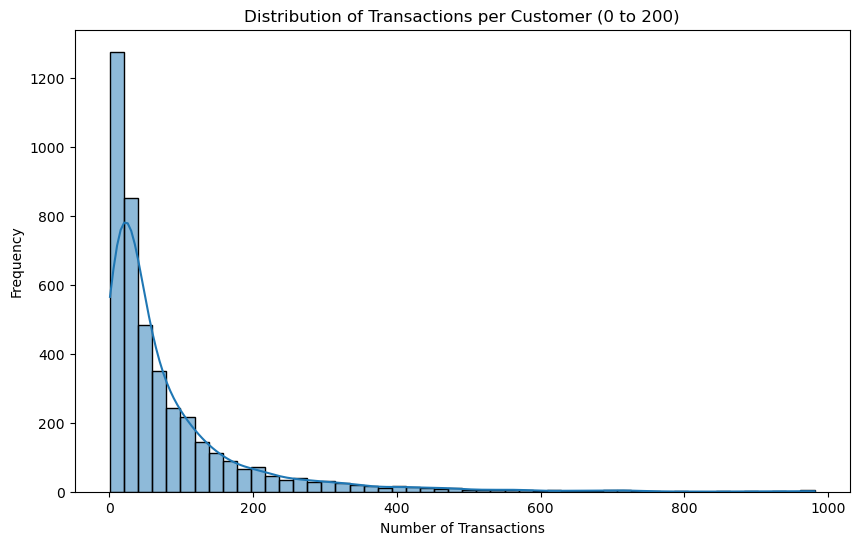

In [12]:
# Analyze the number of transactions per customer
transactions_per_customer = df_cleaned['CustomerID'].value_counts()

# Plot the distribution of transactions per customer, zooming in on a specific range
plt.figure(figsize=(10, 6))
sns.histplot(transactions_per_customer[transactions_per_customer < 1000], bins=50, kde=True)
plt.title('Distribution of Transactions per Customer (0 to 200)')
plt.xlabel('Number of Transactions')
plt.ylabel('Frequency')
plt.show()


/home/andrea/anaconda3/envs/AI-Comm-Mark/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


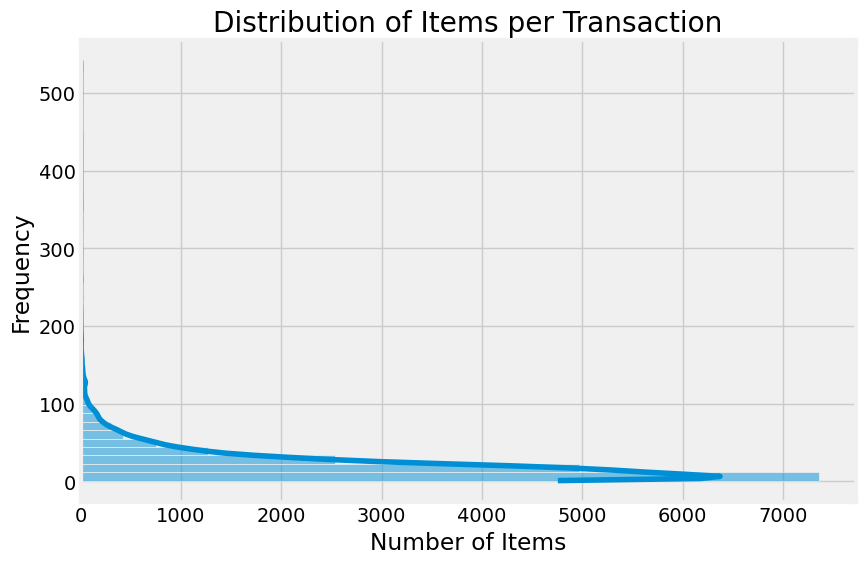

In [13]:
# Aggregate the number of items per transaction
items_per_transaction = df_cleaned.groupby('BillNo')['Itemname'].count().reset_index()
items_per_transaction.columns = ['BillNo', 'nu_records']

# Sort the aggregated data for better visualization
items_per_transaction_sorted = items_per_transaction.sort_values(by='nu_records', ascending=False)

# Plot the distribution of items per transaction using a horizontal bar plot
plt.figure(figsize=(10, 6))
plt.style.use('fivethirtyeight')
sns.histplot(y='nu_records', data=items_per_transaction_sorted, bins=50, kde=True)
plt.xlabel('Number of Items')
plt.ylabel('Frequency')
plt.title('Distribution of Items per Transaction')
plt.show()

Analyzing Most Sold Products

In [14]:
# Aggregate the number of items per transaction
df_agg_items = (
    df_cleaned
    .groupby('Itemname')
    .agg(nu_records=('BillNo', 'count'))
    .reset_index()
    .sort_values(by='nu_records', ascending=False)
)

# Display the top 20 most sold products
top_20_products = df_agg_items.head(20)
top_20_products

,Itemname,nu_records
3667,WHITE HANGING HEART T-LIGHT HOLDER,1976
2738,REGENCY CAKESTAND 3 TIER,1643
1741,JUMBO BAG RED RETROSPOT,1591
205,ASSORTED COLOUR BIRD ORNAMENT,1391
2320,PARTY BUNTING,1369
1921,LUNCH BAG RED RETROSPOT,1293
2970,SET OF 3 CAKE TINS PANTRY DESIGN,1125
1913,LUNCH BAG BLACK SKULL.,1092
2582,POSTAGE,1043
2245,PACK OF 72 RETROSPOT CAKE CASES,1031


In [15]:
# Calculate total sales per product
total_sales_per_product = df_cleaned.groupby('Itemname')['Quantity'].sum().sort_values(ascending=False)

# Display the top 10 most sold products
top_10_products = total_sales_per_product.head(10)
top_10_products

Itemname
PAPER CRAFT , LITTLE BIRDIE           80995
MEDIUM CERAMIC TOP STORAGE JAR        77436
WORLD WAR 2 GLIDERS ASSTD DESIGNS     53167
JUMBO BAG RED RETROSPOT               45715
WHITE HANGING HEART T-LIGHT HOLDER    35425
ASSORTED COLOUR BIRD ORNAMENT         35066
PACK OF 72 RETROSPOT CAKE CASES       31845
POPCORN HOLDER                        29795
RABBIT NIGHT LIGHT                    26944
MINI PAINT SET VINTAGE                25320
Name: Quantity, dtype: int64

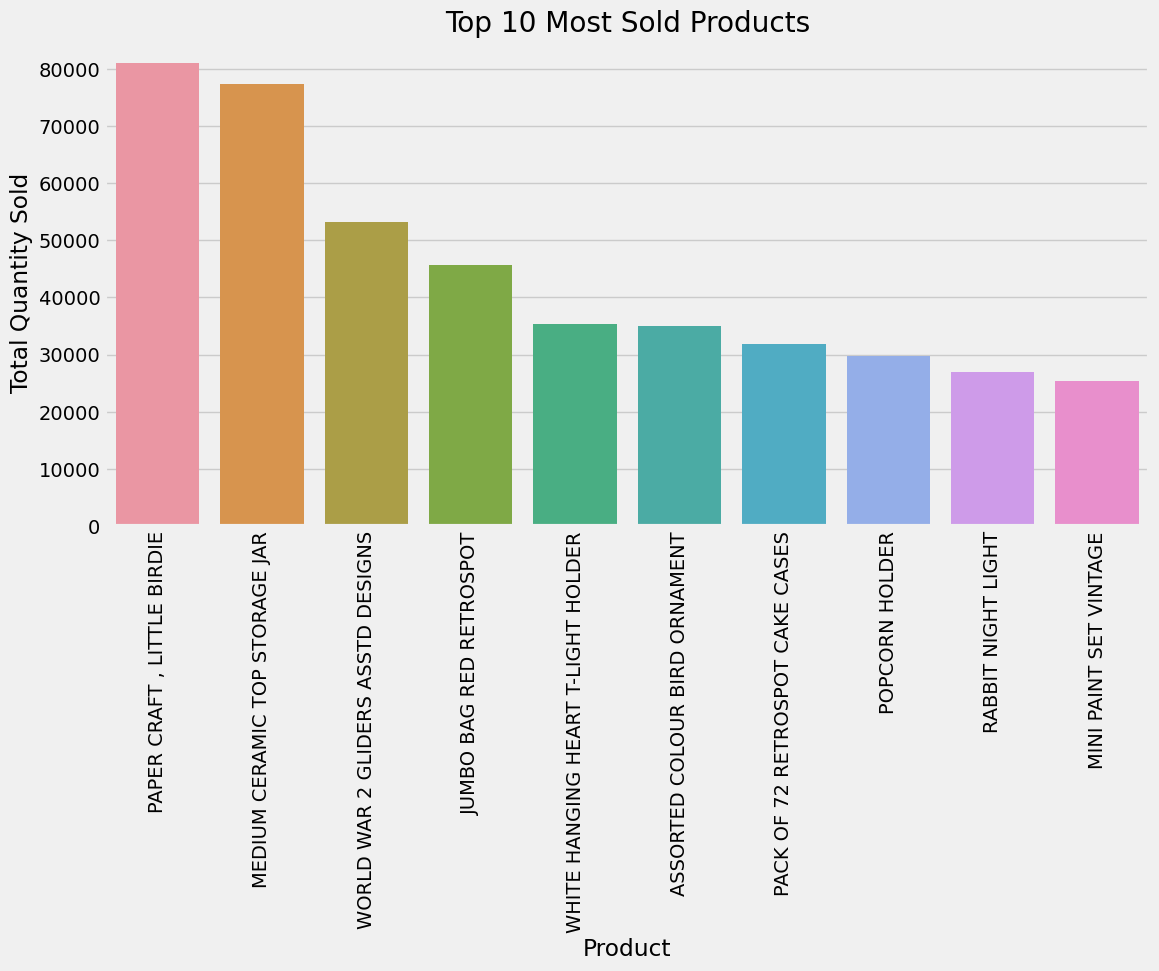

In [16]:
# Plot the top 10 most sold products
plt.figure(figsize=(12, 6))
sns.barplot(x=top_10_products.index, y=top_10_products.values)
plt.title('Top 10 Most Sold Products')
plt.xlabel('Product')
plt.ylabel('Total Quantity Sold')
plt.xticks(rotation=90)
plt.show()

Exploring Sales Over Time

/tmp/ipykernel_19013/829722652.py:5: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_sales = df_raw.resample('M')['Price'].sum()


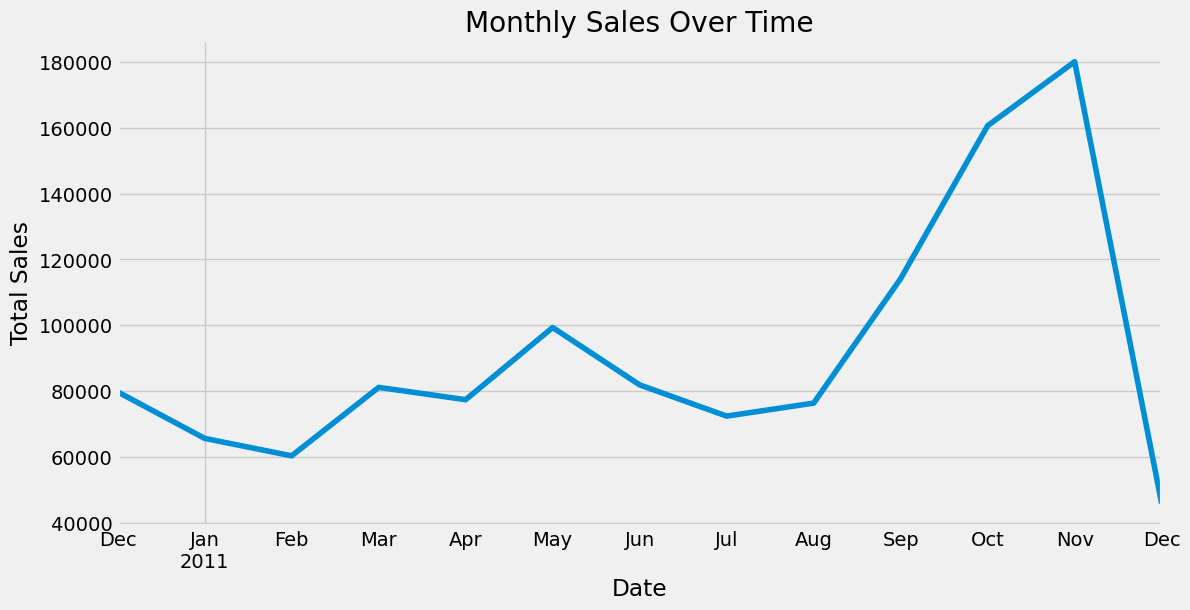

In [17]:
# Set 'Date' as the index
df_raw.set_index('Date', inplace=True)

# Resample the data to get monthly sales
monthly_sales = df_raw.resample('M')['Price'].sum()

# Plot monthly sales
plt.figure(figsize=(12, 6))
monthly_sales.plot()
plt.title('Monthly Sales Over Time')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.show()

Country-wise Analysis

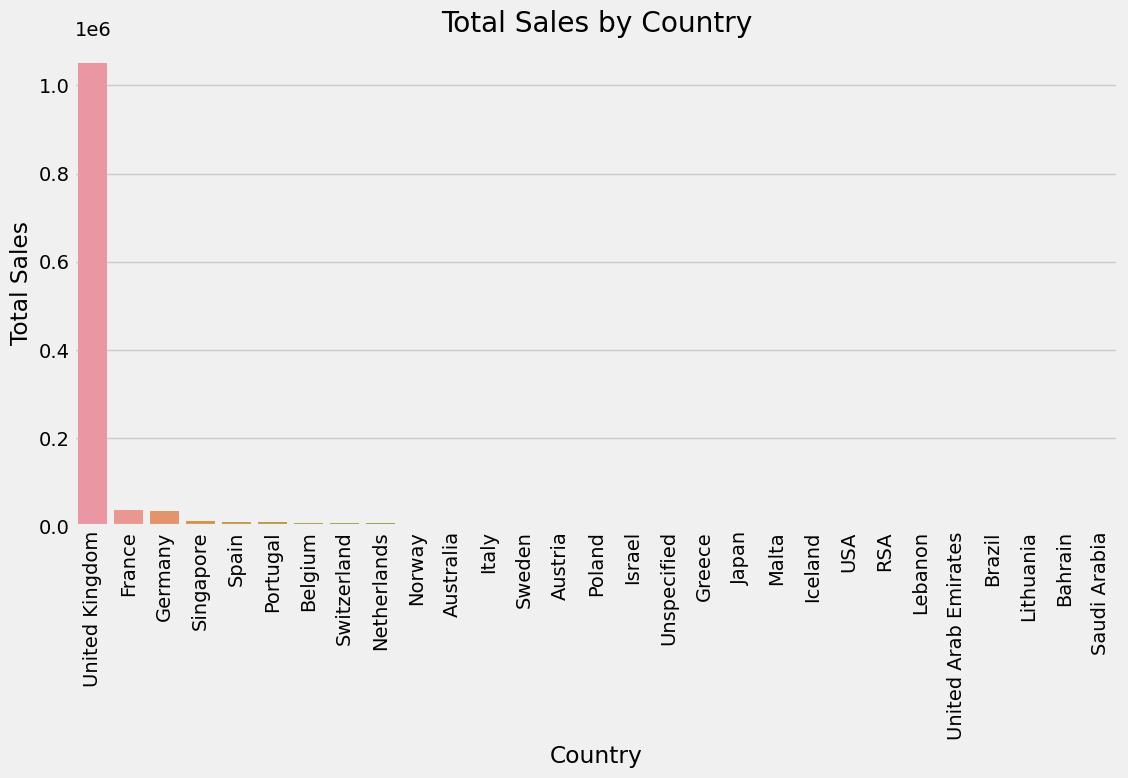

In [18]:
# Analyze the total sales by country
sales_by_country = df_raw.groupby('Country')['Price'].sum().sort_values(ascending=False)

# Plot sales by country
plt.figure(figsize=(12, 6))
sns.barplot(x=sales_by_country.index, y=sales_by_country.values)
plt.title('Total Sales by Country')
plt.xlabel('Country')
plt.ylabel('Total Sales')
plt.xticks(rotation=90)
plt.show()

Total Sales by Country

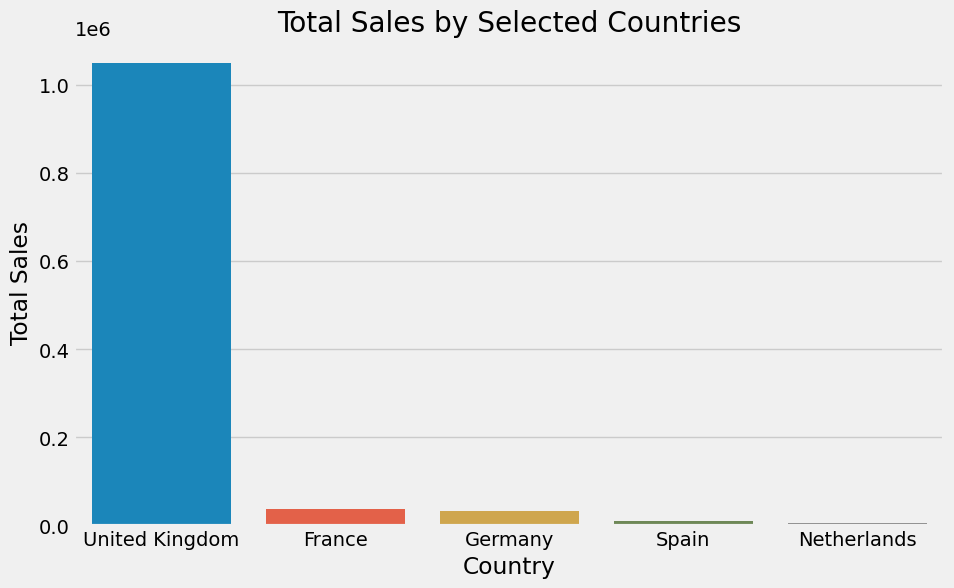

In [19]:
# List of selected countries for detailed analysis
selected_countries = ['United Kingdom', 'France', 'Germany', 'Spain', 'Netherlands']

# Filter the dataframe for selected countries
df_selected_countries = df_cleaned[df_cleaned['Country'].isin(selected_countries)]

# Calculate total sales for selected countries
total_sales_selected_countries = df_selected_countries.groupby('Country')['Price'].sum().sort_values(ascending=False)

# Plot total sales for selected countries
plt.figure(figsize=(10, 6))
sns.barplot(x=total_sales_selected_countries.index, y=total_sales_selected_countries.values)
plt.title('Total Sales by Selected Countries')
plt.xlabel('Country')
plt.ylabel('Total Sales')
plt.show()

Average Sales per Transaction by Country

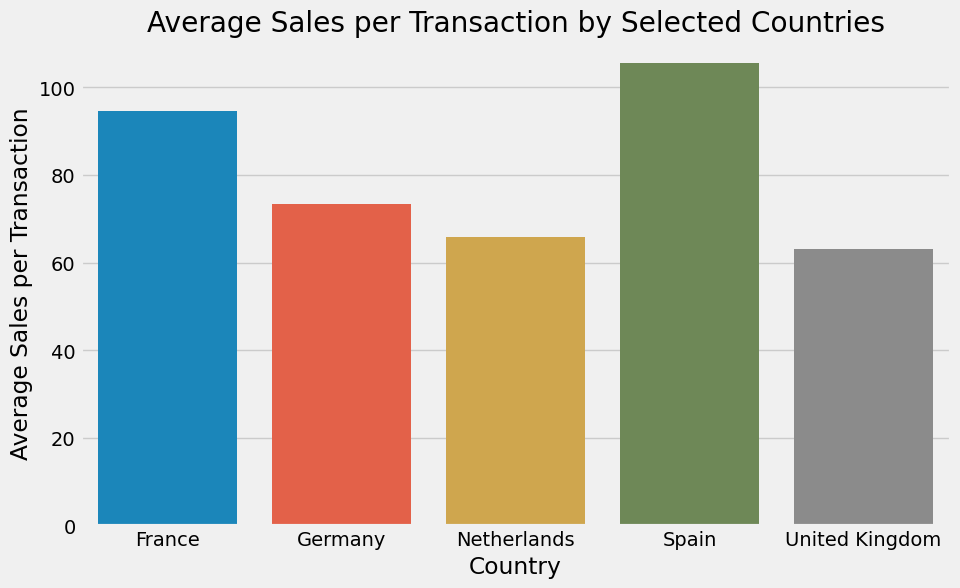

In [20]:
# Calculate average sales per transaction for selected countries
average_sales_per_transaction = df_selected_countries.groupby(['Country', 'BillNo'])['Price'].sum().groupby('Country').mean()

# Plot average sales per transaction for selected countries
plt.figure(figsize=(10, 6))
sns.barplot(x=average_sales_per_transaction.index, y=average_sales_per_transaction.values)
plt.title('Average Sales per Transaction by Selected Countries')
plt.xlabel('Country')
plt.ylabel('Average Sales per Transaction')
plt.show()

Distribution of Products Sold by Country

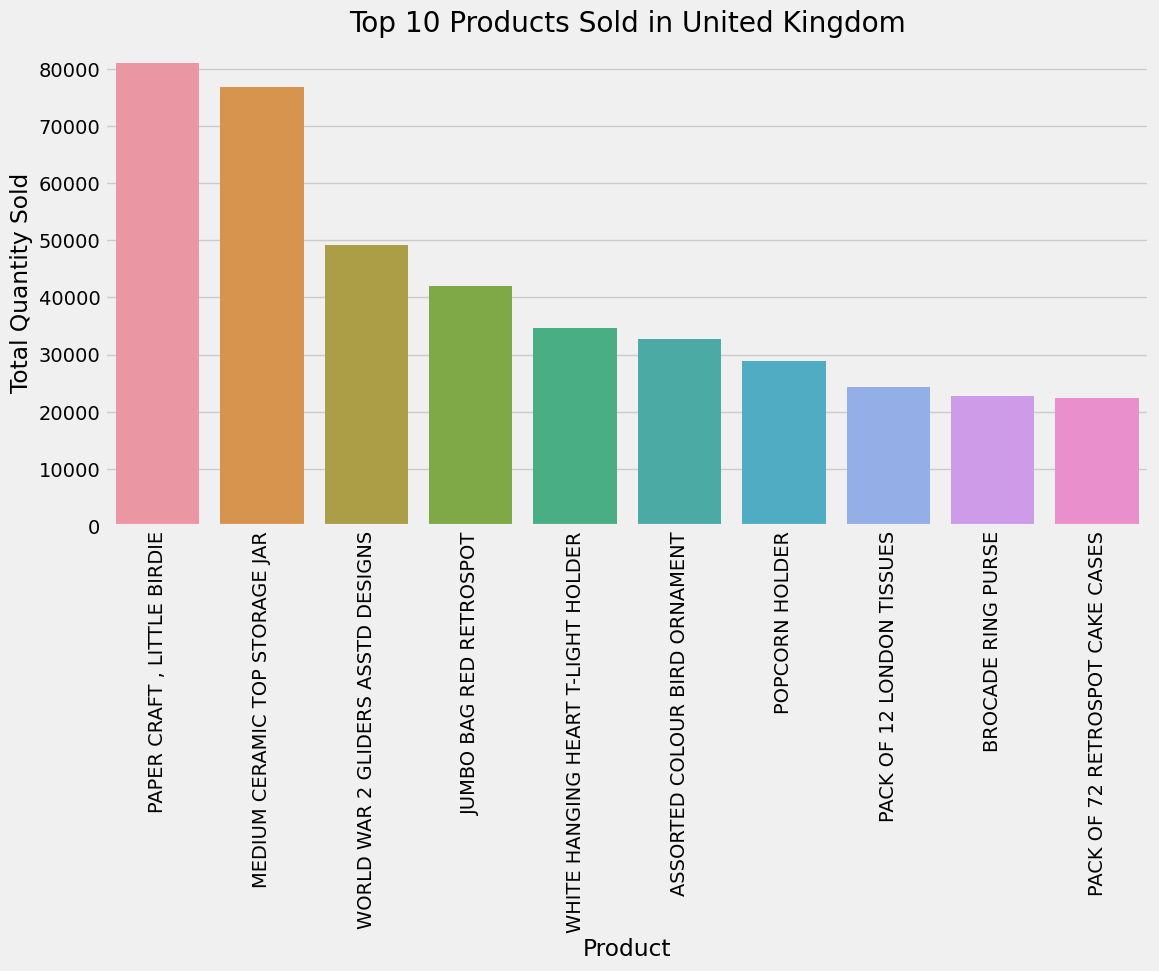

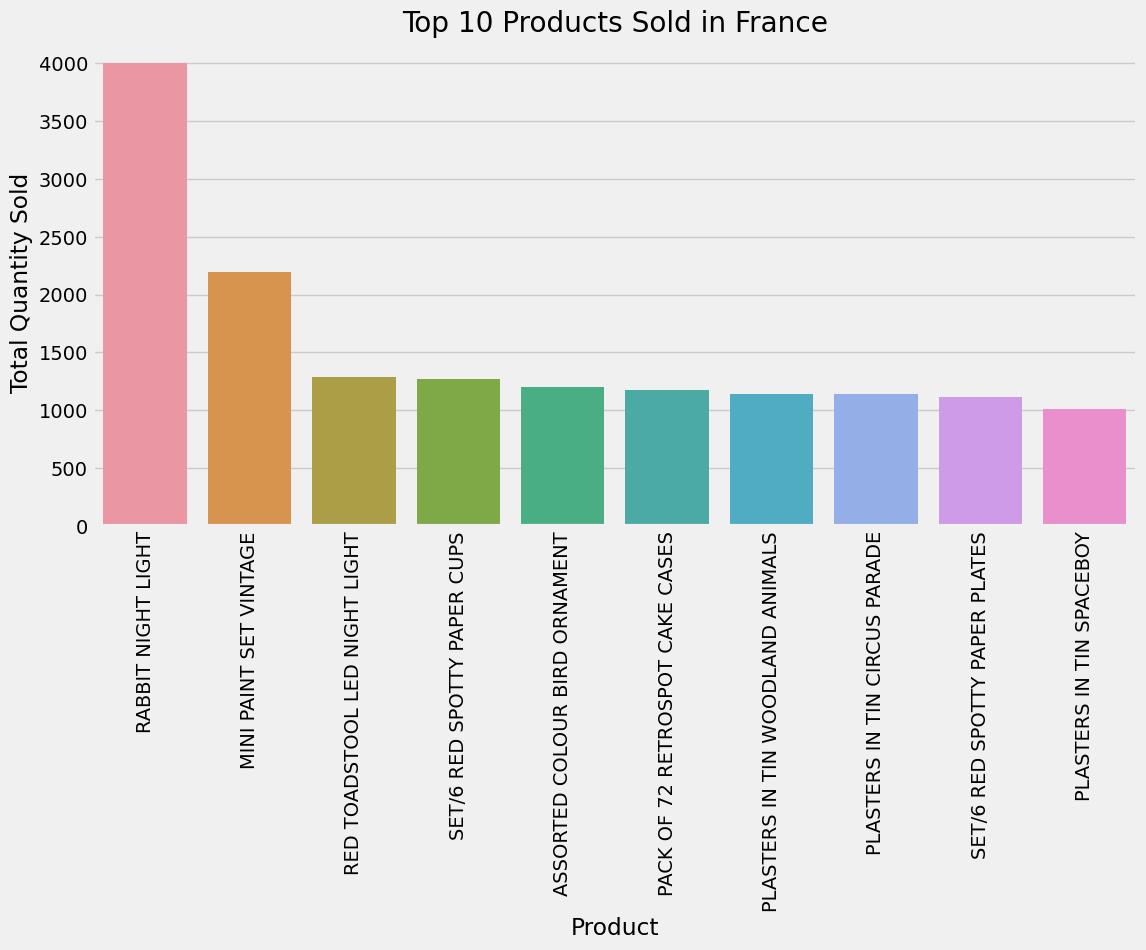

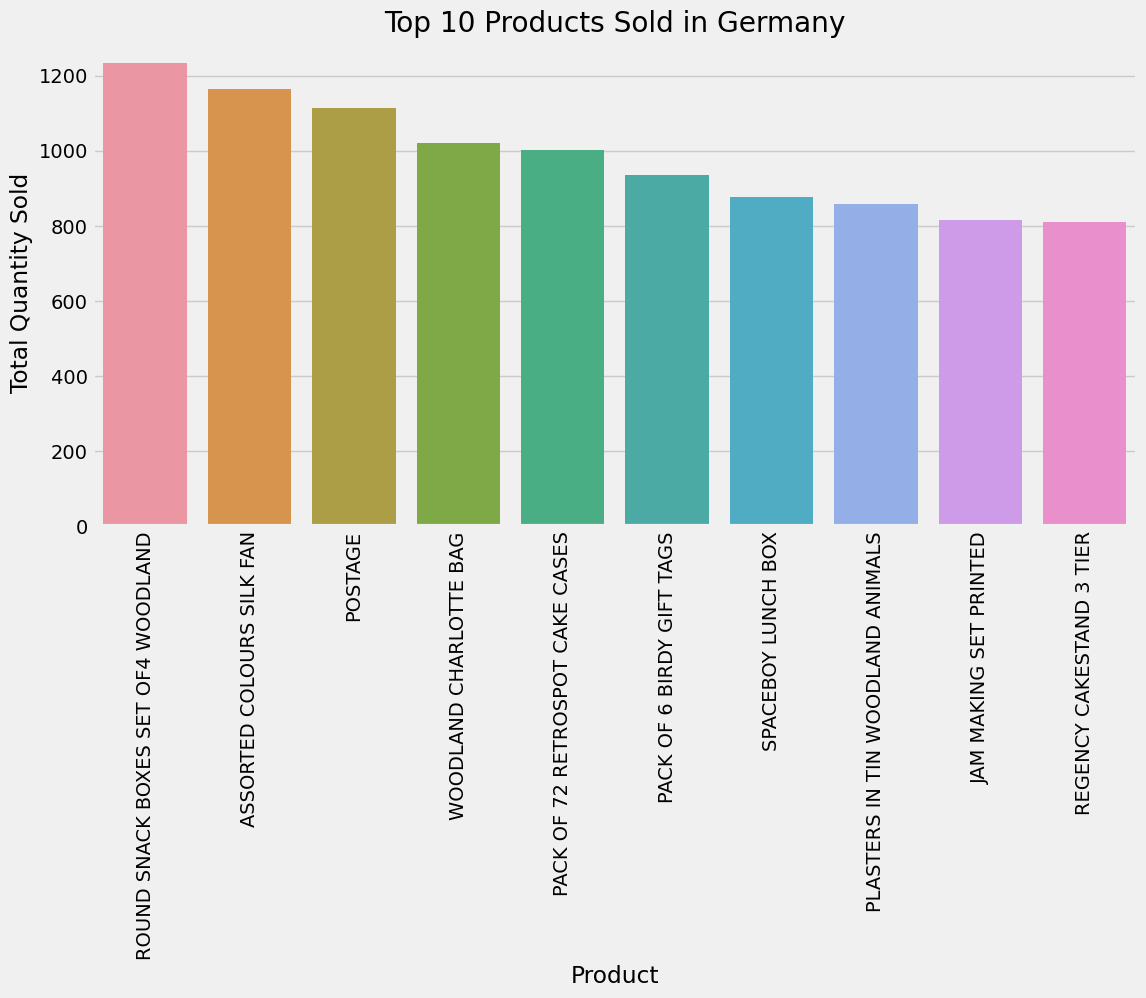

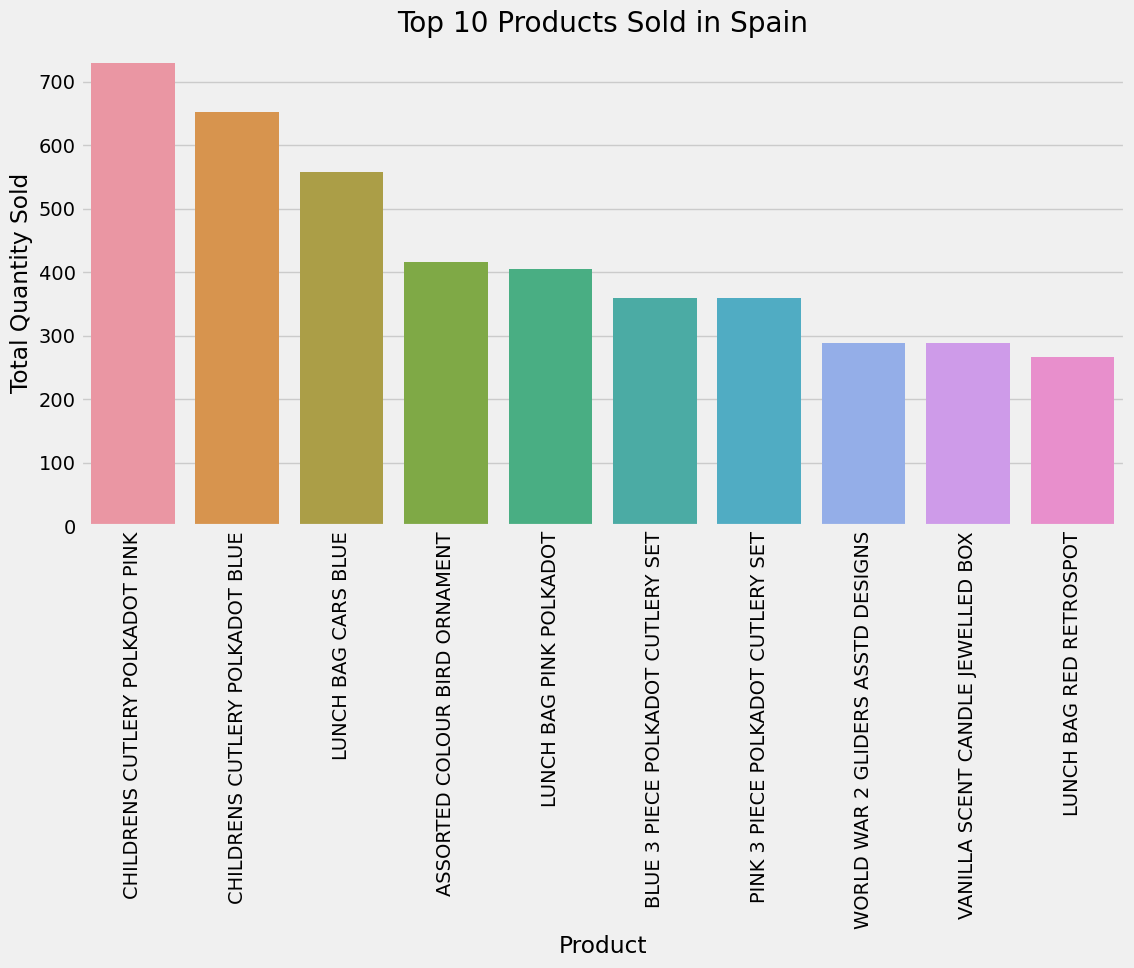

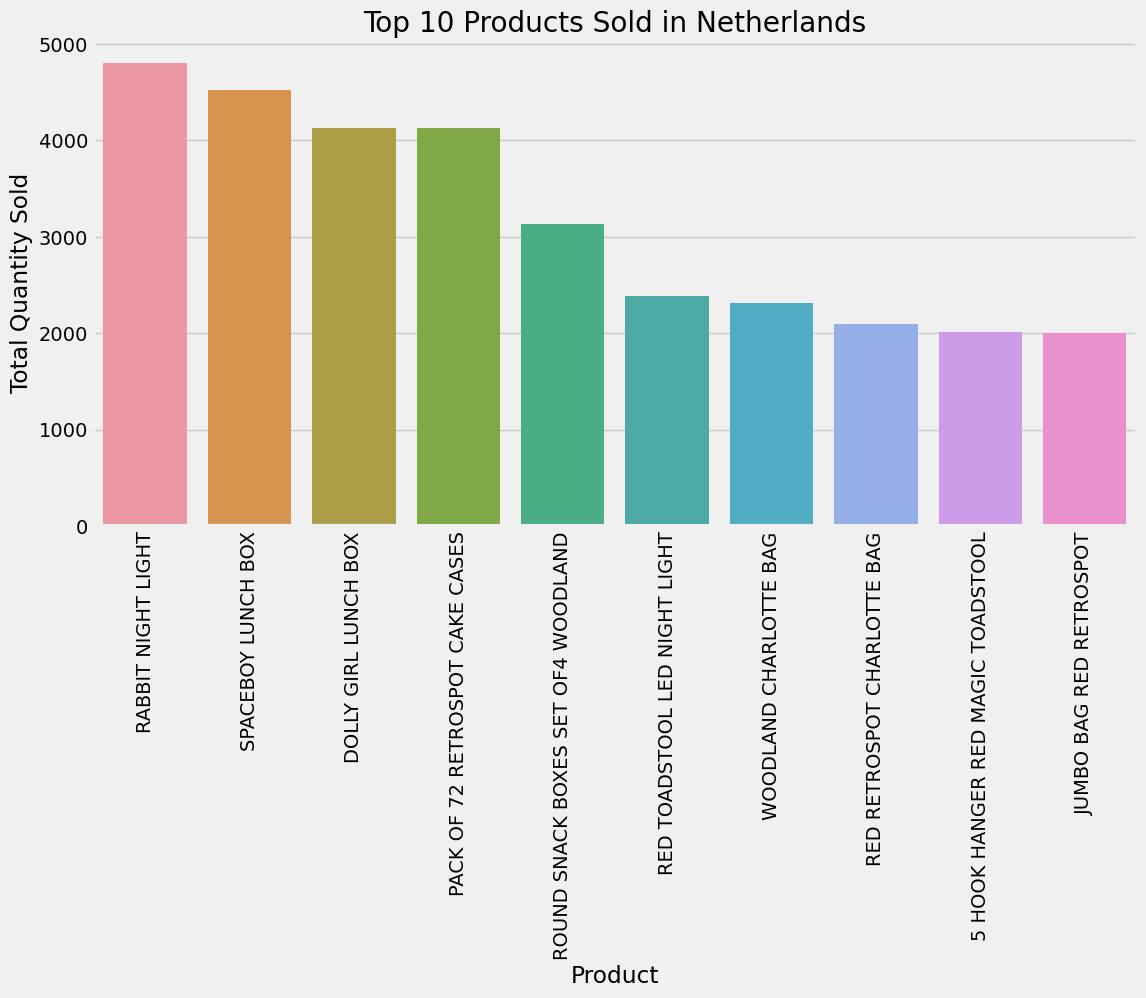

In [21]:
# Calculate total quantity of products sold for selected countries
total_quantity_per_product = df_selected_countries.groupby(['Country', 'Itemname'])['Quantity'].sum().reset_index()

# Plot distribution of top 10 products sold in each selected country
for country in selected_countries:
    top_products = total_quantity_per_product[total_quantity_per_product['Country'] == country].sort_values(by='Quantity', ascending=False).head(10)
    plt.figure(figsize=(12, 6))
    sns.barplot(x=top_products['Itemname'], y=top_products['Quantity'])
    plt.title(f'Top 10 Products Sold in {country}')
    plt.xlabel('Product')
    plt.ylabel('Total Quantity Sold')
    plt.xticks(rotation=90)
    plt.show()

**Interpretation of Top 10 Products Sold by Country**

United Kingdom

The graph for the United Kingdom shows that the top-selling product is "PAPER CRAFT , LITTLE BIRDIE" with a total quantity sold of around 80,000 units. Other popular products include "MEDIUM CERAMIC TOP STORAGE JAR" and "WORLD WAR 2 GLIDERS ASSTD DESIGNS." These items likely appeal to a broad range of customers due to their decorative and practical uses.
France

In France, the most sold product is "RABBIT NIGHT LIGHT," with about 4,000 units sold. This product is followed by "MINI PAINT SET VINTAGE" and "RED TOADSTOOL LED NIGHT LIGHT." The popularity of these items suggests a preference for unique, vintage, and decorative items among French customers.
Germany

For Germany, the leading product is "ROUND SNACK BOXES SET OF 4 WOODLAND" with approximately 1,200 units sold. Other top products include "ASSORTED COLOURS SILK FAN" and "POSTAGE." The presence of practical items like snack boxes and gift tags indicates a focus on utility and gift-related products.
Spain

In Spain, "CHILDRENS CUTLERY POLKADOT PINK" tops the list with about 700 units sold. This is followed by "CHILDRENS CUTLERY POLKADOT BLUE" and "LUNCH BAG CARS BLUE." The dominance of children's items suggests a significant market for children's products in Spain.
Summary

The analysis of the top 10 products sold in these countries highlights the diversity in consumer preferences across different regions. While decorative and practical items are popular in the United Kingdom and Germany, unique and vintage items dominate in France, and children's products are highly sought after in Spain. Understanding these preferences can help retailers tailor their marketing strategies and inventory to better meet the demands of customers in each country.

In [22]:
## Aggregate the number of unique items per transaction (BillNo)
df_agg_purchases = (
    df_cleaned
    .groupby('BillNo')
    .agg(nu_items=('Itemname', 'count'))
    .reset_index()
    .sort_values(by='nu_items', ascending=False)
)

# Display descriptive statistics for the aggregated purchase counts
df_agg_purchases_stats = df_agg_purchases.describe(percentiles=[.01, .05, .1, .2, .3, .4, .5, .6, .7, .8, .90, .95, .99]).T
df_agg_purchases_stats

,count,mean,std,min,1%,5%,10%,20%,30%,40%,50%,60%,70%,80%,90%,95%,99%,max
nu_items,18165.0,21.361024,24.93569,1.0,1.0,1.0,2.0,5.0,8.0,11.0,15.0,19.0,24.0,31.0,48.0,64.0,112.0,542.0


The dataset includes 18,165 transactions, with an average of 21.36 unique items per transaction and a standard deviation of 24.94, indicating considerable variability. The 50th percentile value (median) is 15 items, meaning half of the transactions contain 15 or fewer items. Notably, 60% of transactions contain 19 or fewer items, while 10% of transactions include 48 or more items. This wide range in transaction sizes suggests that the resulting association rules will capture a mix of short and long purchase patterns, reflecting diverse consumer behaviors.

# Market Basket Analysis

In [23]:
# !pip install mlxtend

Applying the Apriori Algorithm

In [49]:
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules

# Sample a subset of the dataset for analysis
df_sampled = df_cleaned.sample(frac=0.5, random_state=42)

# Prepare the data by aggregating quantities
basket_sampled = df_sampled.groupby(['BillNo', 'Itemname'])['Quantity'].sum().unstack().reset_index().fillna(0).set_index('BillNo')

# Convert quantities to True and False (binary encoding with bool type)
basket_sampled = basket_sampled.applymap(lambda x: True if x > 0 else False)

# Display the basket matrix to check if it contains binary values
basket_sampled.head()

/tmp/ipykernel_19013/1493817455.py:11: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  basket_sampled = basket_sampled.applymap(lambda x: True if x > 0 else False)


Itemname,10 COLOUR SPACEBOY PEN,12 COLOURED PARTY BALLOONS,12 DAISY PEGS IN WOOD BOX,12 EGG HOUSE PAINTED WOOD,12 HANGING EGGS HAND PAINTED,12 IVORY ROSE PEG PLACE SETTINGS,12 MESSAGE CARDS WITH ENVELOPES,12 PENCIL SMALL TUBE WOODLAND,12 PENCILS SMALL TUBE RED RETROSPOT,12 PENCILS SMALL TUBE SKULL,...,ZINC METAL HEART DECORATION,ZINC PLANT POT HOLDER,ZINC SWEETHEART SOAP DISH,ZINC SWEETHEART WIRE LETTER RACK,ZINC T-LIGHT HOLDER STAR LARGE,ZINC T-LIGHT HOLDER STARS SMALL,ZINC TOP 2 DOOR WOODEN SHELF,ZINC WILLIE WINKIE CANDLE STICK,ZINC WIRE KITCHEN ORGANISER,ZINC WIRE SWEETHEART LETTER TRAY
BillNo,,,,,,,,,,,,,,,,,,,,,
536365,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
536366,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
536367,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
536368,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
536370,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [50]:
# Parameters for Apriori
MIN_SUPPORT_APRIORI = 0.005  # Adjust as necessary
MAX_LEN_APRIORI = 3

# Apply the Apriori algorithm to find frequent itemsets
frequent_itemsets_apriori = apriori(basket_sampled, min_support=MIN_SUPPORT_APRIORI, max_len=MAX_LEN_APRIORI, use_colnames=True)

# Add a new column for itemset length
frequent_itemsets_apriori['itemset_length'] = frequent_itemsets_apriori['itemsets'].apply(lambda x: len(x))

# Filter and sort the frequent itemsets
frequent_itemsets_filtered_apriori = frequent_itemsets_apriori.loc[frequent_itemsets_apriori.itemset_length > 1].sort_values('support', ascending=False)
display(frequent_itemsets_filtered_apriori.head())

,support,itemsets,itemset_length
691,0.008515,"(JUMBO BAG RED RETROSPOT, JUMBO BAG PINK POLKA...",2
680,0.008340,"(ALARM CLOCK BAKELIKE GREEN, ALARM CLOCK BAKEL...",2
686,0.007874,"(GREEN REGENCY TEACUP AND SAUCER, ROSES REGENC...",2
701,0.007815,"(LUNCH BAG RED RETROSPOT, LUNCH BAG BLACK SKU...",2
716,0.007582,"(LUNCH BAG RED RETROSPOT, LUNCH BAG SPACEBOY D...",2


Generate and Analyze Association Rules

In [55]:
# Generate the association rules
ASSOCIATION_RULES_METRIC = "lift"
ASSOCIATION_RULES_MIN_THRESHOLD = 1

df_rules_apriori = association_rules(frequent_itemsets_apriori, metric=ASSOCIATION_RULES_METRIC, min_threshold=ASSOCIATION_RULES_MIN_THRESHOLD)
display(df_rules_apriori.head())

# Fine-tune thresholds
relevant_rules_apriori = df_rules_apriori[(df_rules_apriori['confidence'] > 0.3) & (df_rules_apriori['lift'] > 1.0)]
relevant_rules_apriori = relevant_rules_apriori.sort_values(by='lift', ascending=False)
display(relevant_rules_apriori.head(10))

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(ALARM CLOCK BAKELIKE PINK),(ALARM CLOCK BAKELIKE GREEN),0.017497,0.022688,0.005016,0.286667,12.635441,0.004619,1.370064,0.937257
1,(ALARM CLOCK BAKELIKE GREEN),(ALARM CLOCK BAKELIKE PINK),0.022688,0.017497,0.005016,0.221080,12.635441,0.004619,1.261366,0.942234
2,(ALARM CLOCK BAKELIKE GREEN),(ALARM CLOCK BAKELIKE RED),0.022688,0.024437,0.008340,0.367609,15.043027,0.007786,1.542658,0.955195
3,(ALARM CLOCK BAKELIKE RED),(ALARM CLOCK BAKELIKE GREEN),0.024437,0.022688,0.008340,0.341289,15.043027,0.007786,1.483674,0.956908
4,(ALARM CLOCK BAKELIKE PINK),(ALARM CLOCK BAKELIKE RED),0.017497,0.024437,0.005891,0.336667,13.776818,0.005463,1.470698,0.943930


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
97,(WOODEN STAR CHRISTMAS SCANDINAVIAN),(WOODEN HEART CHRISTMAS SCANDINAVIAN),0.012889,0.013881,0.005191,0.402715,29.012396,0.005012,1.651003,0.978140
96,(WOODEN HEART CHRISTMAS SCANDINAVIAN),(WOODEN STAR CHRISTMAS SCANDINAVIAN),0.013881,0.012889,0.005191,0.373950,29.012396,0.005012,1.576727,0.979123
10,(GREEN REGENCY TEACUP AND SAUCER),(PINK REGENCY TEACUP AND SAUCER),0.019596,0.014814,0.006182,0.315476,21.295885,0.005892,1.439228,0.972092
11,(PINK REGENCY TEACUP AND SAUCER),(GREEN REGENCY TEACUP AND SAUCER),0.014814,0.019596,0.006182,0.417323,21.295885,0.005892,1.682585,0.967373
89,(PINK REGENCY TEACUP AND SAUCER),(ROSES REGENCY TEACUP AND SAUCER),0.014814,0.022513,0.006066,0.409449,18.187589,0.005732,1.655212,0.959227
15,(ROSES REGENCY TEACUP AND SAUCER),(GREEN REGENCY TEACUP AND SAUCER),0.022513,0.019596,0.007874,0.349741,17.847197,0.007432,1.507712,0.965709
14,(GREEN REGENCY TEACUP AND SAUCER),(ROSES REGENCY TEACUP AND SAUCER),0.019596,0.022513,0.007874,0.401786,17.847197,0.007432,1.634009,0.962837
7,(SPACEBOY LUNCH BOX),(DOLLY GIRL LUNCH BOX),0.020996,0.017613,0.006590,0.313889,17.820990,0.006221,1.431818,0.964129
6,(DOLLY GIRL LUNCH BOX),(SPACEBOY LUNCH BOX),0.017613,0.020996,0.006590,0.374172,17.820990,0.006221,1.564334,0.960810
9,(GARDENERS KNEELING PAD CUP OF TEA),(GARDENERS KNEELING PAD KEEP CALM),0.016972,0.021696,0.005599,0.329897,15.205410,0.005231,1.459931,0.950363


 The rule with higher Lift value seems to be 
 'WOODEN HEART CHRISTMAS SCANDINAVIAN' / 'WOODEN STAR CHRISTMAS SCANDINAVIAN' --(implies)--> 'WOODEN STAR CHRISTMAS SCANDINAVIAN' / 'WOODEN HEART CHRISTMAS SCANDINAVIAN', 
 followed by 
 'GREEN REGENCY TEACUP AND SAUCER' / 'PINK REGENCY TEACUP AND SAUCER' --(implies)--> 'PINK REGENCY TEACUP AND SAUCER' / 'GREEN REGENCY TEACUP AND SAUCER'

## Generate Frequent Itemsets using Apriori

In [59]:
# Prepare the data by aggregating quantities
basket_sampled = df_cleaned.groupby(['BillNo', 'Itemname'])['Quantity'].sum().unstack().reset_index().fillna(0).set_index('BillNo')

# Convert quantities to True and False (binary encoding with bool type)
basket_sampled = basket_sampled.applymap(lambda x: True if x > 0 else False)


/tmp/ipykernel_19013/1468061583.py:5: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  basket_sampled = basket_sampled.applymap(lambda x: True if x > 0 else False)


In [60]:
from mlxtend.frequent_patterns import fpgrowth

# Parameters for FPGrowth
MIN_SUPPORT_FPGROWTH = 0.005  # Adjust as necessary
MAX_LEN_FPGROWTH = 3

# Apply the FPGrowth algorithm to find frequent itemsets
frequent_itemsets_fpgrowth = fpgrowth(basket_sampled, min_support=MIN_SUPPORT_FPGROWTH, max_len=MAX_LEN_FPGROWTH, use_colnames=True)

# Add a new column for itemset length
frequent_itemsets_fpgrowth['itemset_length'] = frequent_itemsets_fpgrowth['itemsets'].apply(lambda x: len(x))

# Filter and sort the frequent itemsets
frequent_itemsets_filtered_fpgrowth = frequent_itemsets_fpgrowth.loc[frequent_itemsets_fpgrowth.itemset_length > 1].sort_values('support', ascending=False)
display(frequent_itemsets_filtered_fpgrowth.head())

,support,itemsets,itemset_length
1424,0.029727,"(JUMBO BAG RED RETROSPOT, JUMBO BAG PINK POLKA...",2
1295,0.028847,"(ALARM CLOCK BAKELIKE GREEN, ALARM CLOCK BAKEL...",2
1936,0.028076,"(LUNCH BAG RED RETROSPOT, LUNCH BAG PINK POLKA...",2
2037,0.027966,"(LUNCH BAG RED RETROSPOT, LUNCH BAG BLACK SKU...",2
2462,0.027856,"(GREEN REGENCY TEACUP AND SAUCER, ROSES REGENC...",2


In [61]:
# Generate the association rules
df_rules_fpgrowth = association_rules(frequent_itemsets_fpgrowth, metric=ASSOCIATION_RULES_METRIC, min_threshold=ASSOCIATION_RULES_MIN_THRESHOLD)
display(df_rules_fpgrowth.head())

# Fine-tune thresholds
relevant_rules_fpgrowth = df_rules_fpgrowth[(df_rules_fpgrowth['confidence'] > 0.5) & (df_rules_fpgrowth['lift'] > 1.0)]
relevant_rules_fpgrowth = relevant_rules_fpgrowth.sort_values(by='lift', ascending=False)
display(relevant_rules_fpgrowth.head(10))

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(CHOCOLATE HOT WATER BOTTLE),(KNITTED UNION FLAG HOT WATER BOTTLE),0.037325,0.017451,0.005395,0.144543,8.282711,0.004744,1.148566,0.913357
1,(KNITTED UNION FLAG HOT WATER BOTTLE),(CHOCOLATE HOT WATER BOTTLE),0.017451,0.037325,0.005395,0.309148,8.282711,0.004744,1.393462,0.894883
2,(RED WOOLLY HOTTIE WHITE HEART.),(KNITTED UNION FLAG HOT WATER BOTTLE),0.017286,0.017451,0.005285,0.305732,17.519339,0.004983,1.415231,0.959506
3,(KNITTED UNION FLAG HOT WATER BOTTLE),(RED WOOLLY HOTTIE WHITE HEART.),0.017451,0.017286,0.005285,0.302839,17.519339,0.004983,1.409594,0.959668
4,(SCOTTIE DOG HOT WATER BOTTLE),(RED WOOLLY HOTTIE WHITE HEART.),0.035453,0.017286,0.005395,0.152174,8.803309,0.004782,1.159099,0.918987


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
7575,(DOLLY GIRL CHILDRENS BOWL),"(SPACEBOY CHILDRENS BOWL, DOLLY GIRL CHILDRENS...",0.007542,0.005230,0.005065,0.671533,128.404149,0.005025,3.028522,0.999752
7570,"(SPACEBOY CHILDRENS BOWL, DOLLY GIRL CHILDRENS...",(DOLLY GIRL CHILDRENS BOWL),0.005230,0.007542,0.005065,0.968421,128.404149,0.005025,31.427837,0.997428
7567,(DOLLY GIRL CHILDRENS BOWL),(DOLLY GIRL CHILDRENS CUP),0.007542,0.007652,0.006221,0.824818,107.790002,0.006163,5.664653,0.998251
7566,(DOLLY GIRL CHILDRENS CUP),(DOLLY GIRL CHILDRENS BOWL),0.007652,0.007542,0.006221,0.812950,107.790002,0.006163,5.305833,0.998362
7571,"(SPACEBOY CHILDRENS BOWL, DOLLY GIRL CHILDRENS...",(DOLLY GIRL CHILDRENS CUP),0.006276,0.007652,0.005065,0.807018,105.463839,0.005017,5.142167,0.996774
7574,(DOLLY GIRL CHILDRENS CUP),"(SPACEBOY CHILDRENS BOWL, DOLLY GIRL CHILDRENS...",0.007652,0.006276,0.005065,0.661871,105.463839,0.005017,2.938886,0.998156
8014,(DOLLY GIRL BEAKER),(SPACEBOY BEAKER),0.007157,0.007487,0.005395,0.753846,100.688348,0.005341,4.032084,0.997205
8015,(SPACEBOY BEAKER),(DOLLY GIRL BEAKER),0.007487,0.007157,0.005395,0.720588,100.688348,0.005341,3.553334,0.997537
4598,(PACK OF 6 SKULL PAPER PLATES),(PACK OF 6 SKULL PAPER CUPS),0.007927,0.007927,0.006166,0.777778,98.113426,0.006103,4.464327,0.997717
4599,(PACK OF 6 SKULL PAPER CUPS),(PACK OF 6 SKULL PAPER PLATES),0.007927,0.007927,0.006166,0.777778,98.113426,0.006103,4.464327,0.997717


In [58]:
# Compare the number of frequent itemsets
print("Number of frequent itemsets (Apriori):", len(frequent_itemsets_filtered_apriori))
print("Number of frequent itemsets (FPGrowth):", len(frequent_itemsets_filtered_fpgrowth))

# Display the top association rules for each algorithm
display("Top 10 association rules (Apriori):")
display(relevant_rules_apriori.head(10))

display("Top 10 association rules (FPGrowth):")
display(relevant_rules_fpgrowth.head(10))

Number of frequent itemsets (Apriori): 49
Number of frequent itemsets (FPGrowth): 2512


'Top 10 association rules (Apriori):'

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
97,(WOODEN STAR CHRISTMAS SCANDINAVIAN),(WOODEN HEART CHRISTMAS SCANDINAVIAN),0.012889,0.013881,0.005191,0.402715,29.012396,0.005012,1.651003,0.978140
96,(WOODEN HEART CHRISTMAS SCANDINAVIAN),(WOODEN STAR CHRISTMAS SCANDINAVIAN),0.013881,0.012889,0.005191,0.373950,29.012396,0.005012,1.576727,0.979123
10,(GREEN REGENCY TEACUP AND SAUCER),(PINK REGENCY TEACUP AND SAUCER),0.019596,0.014814,0.006182,0.315476,21.295885,0.005892,1.439228,0.972092
11,(PINK REGENCY TEACUP AND SAUCER),(GREEN REGENCY TEACUP AND SAUCER),0.014814,0.019596,0.006182,0.417323,21.295885,0.005892,1.682585,0.967373
89,(PINK REGENCY TEACUP AND SAUCER),(ROSES REGENCY TEACUP AND SAUCER),0.014814,0.022513,0.006066,0.409449,18.187589,0.005732,1.655212,0.959227
15,(ROSES REGENCY TEACUP AND SAUCER),(GREEN REGENCY TEACUP AND SAUCER),0.022513,0.019596,0.007874,0.349741,17.847197,0.007432,1.507712,0.965709
14,(GREEN REGENCY TEACUP AND SAUCER),(ROSES REGENCY TEACUP AND SAUCER),0.019596,0.022513,0.007874,0.401786,17.847197,0.007432,1.634009,0.962837
7,(SPACEBOY LUNCH BOX),(DOLLY GIRL LUNCH BOX),0.020996,0.017613,0.006590,0.313889,17.820990,0.006221,1.431818,0.964129
6,(DOLLY GIRL LUNCH BOX),(SPACEBOY LUNCH BOX),0.017613,0.020996,0.006590,0.374172,17.820990,0.006221,1.564334,0.960810
9,(GARDENERS KNEELING PAD CUP OF TEA),(GARDENERS KNEELING PAD KEEP CALM),0.016972,0.021696,0.005599,0.329897,15.205410,0.005231,1.459931,0.950363


'Top 10 association rules (FPGrowth):'

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
7575,(DOLLY GIRL CHILDRENS BOWL),"(SPACEBOY CHILDRENS BOWL, DOLLY GIRL CHILDRENS...",0.007542,0.005230,0.005065,0.671533,128.404149,0.005025,3.028522,0.999752
7570,"(SPACEBOY CHILDRENS BOWL, DOLLY GIRL CHILDRENS...",(DOLLY GIRL CHILDRENS BOWL),0.005230,0.007542,0.005065,0.968421,128.404149,0.005025,31.427837,0.997428
7567,(DOLLY GIRL CHILDRENS BOWL),(DOLLY GIRL CHILDRENS CUP),0.007542,0.007652,0.006221,0.824818,107.790002,0.006163,5.664653,0.998251
7566,(DOLLY GIRL CHILDRENS CUP),(DOLLY GIRL CHILDRENS BOWL),0.007652,0.007542,0.006221,0.812950,107.790002,0.006163,5.305833,0.998362
7571,"(SPACEBOY CHILDRENS BOWL, DOLLY GIRL CHILDRENS...",(DOLLY GIRL CHILDRENS CUP),0.006276,0.007652,0.005065,0.807018,105.463839,0.005017,5.142167,0.996774
7574,(DOLLY GIRL CHILDRENS CUP),"(SPACEBOY CHILDRENS BOWL, DOLLY GIRL CHILDRENS...",0.007652,0.006276,0.005065,0.661871,105.463839,0.005017,2.938886,0.998156
8014,(DOLLY GIRL BEAKER),(SPACEBOY BEAKER),0.007157,0.007487,0.005395,0.753846,100.688348,0.005341,4.032084,0.997205
8015,(SPACEBOY BEAKER),(DOLLY GIRL BEAKER),0.007487,0.007157,0.005395,0.720588,100.688348,0.005341,3.553334,0.997537
4598,(PACK OF 6 SKULL PAPER PLATES),(PACK OF 6 SKULL PAPER CUPS),0.007927,0.007927,0.006166,0.777778,98.113426,0.006103,4.464327,0.997717
4599,(PACK OF 6 SKULL PAPER CUPS),(PACK OF 6 SKULL PAPER PLATES),0.007927,0.007927,0.006166,0.777778,98.113426,0.006103,4.464327,0.997717


# Conclusion and Recommendations

### Conclusion

Based on the comparison of Apriori and FPGrowth algorithms, we can draw the following conclusions:

1. **Efficiency**:
   - The FPGrowth algorithm identified a significantly larger number of frequent itemsets (2512) compared to the Apriori algorithm (49). This indicates that FPGrowth is more efficient and capable of handling larger datasets with more complex associations.

2. **Strength of Associations**:
   - The association rules generated by FPGrowth have higher lift values compared to those generated by Apriori. Higher lift values suggest stronger associations between products, which can be leveraged for more effective cross-selling and up-selling strategies.

3. **Business Insights**:
   - Both algorithms revealed valuable insights into customer purchasing patterns. For instance, items such as `DOLLY GIRL CHILDRENS BOWL` and `SPACEBOY CHILDRENS BOWL` show strong associations, indicating that customers often purchase these items together.

### Recommendations

1. **Create Product Bundles**:
   - Based on the identified association rules, create product bundles that offer discounts for purchasing frequently associated items together. For example, bundle `DOLLY GIRL CHILDRENS BOWL` with `SPACEBOY CHILDRENS BOWL` to encourage customers to purchase both items.

2. **Targeted Promotions**:
   - Utilize the strong associations identified to run targeted promotions. Design email marketing campaigns and in-store promotions that highlight these bundles to attract customer interest and increase transaction values.

3. **Optimize Inventory Management**:
   - Align inventory management practices with the insights from the association rules. Ensure that frequently bought-together items are stocked together to reduce stockouts and improve customer satisfaction.

4. **Customer Segmentation and Personalization**:
   - Segment customers based on their purchase behaviors and use the association rules to provide personalized product recommendations. This approach can enhance customer engagement and loyalty by making customers feel understood and catered to.

5. **Monitor and Adjust Strategies**:
   - Continuously monitor the performance of the implemented strategies. Adjust the association rules and recommendations based on evolving purchase patterns and customer feedback to maintain relevance and effectiveness.

### Next Steps

1. **Implementation**:
   - Collaborate with marketing, sales, and inventory management teams to implement the recommended bundling strategies and targeted promotions.

2. **Continuous Monitoring**:
   - Establish a system for continuously monitoring the effectiveness of the strategies. Collect data on customer responses and sales performance to identify areas for improvement.

3. **Advanced Analysis**:
   - Explore more advanced machine learning techniques and integrate additional data sources for a deeper understanding of customer behavior. This can lead to more sophisticated and effective recommendation systems.

By leveraging the insights gained from market basket analysis, the retailer can enhance customer experience, increase sales, and improve overall business performance. The continuous refinement of these strategies will ensure sustained success in a competitive market.